In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

### Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

Computer vision is the pratice of writing algorthims which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front

| Hyperparamter/Layer type | What does it do?                                                      | Typical Values                                                                      |
|--------------------------|-----------------------------------------------------------------------|-------------------------------------------------------------------------------------|
| Input image(s)           | Target images you'd like to discover patterns in it                   | Whatever you can take a photo (or video) of                                         |
| Input Layer              | Takes in target images and preprocesses them for further layers       | input_shape = [batch_size, image_hieght, image_width, color channels]               |
| Convulational Layer      | Extracts/learns the most important features from the target in images | Multiple, can create with tf.keras.layers.ConvXD (X can be multiple values)         |
| Hidden activation        | Adds non-linearity to learned features (non-straight lines)           | Usually ReLU (tf.keras.activation.relu)                                             |
| pooling layer            | Reduces the dimensionality of learned images features                 | Average (tf.keras.activation.AvgPool2D) or Max (tf.keras.layers.MaxPool2D)          |
| Fully Connected layer    | Further refines learned features from convolution layers              | tf.keras.layers.Dense                                                               |
| Output Layer             | Takes learned features and outputs them in shape of target labels     | output_shape = [number_of_classes] (e.g. 3 for pizza, steak or sushi)               |
| Output activation        | Adds Non-linearities to output layer                                  | tf.keras.activations.sigmoid(binary classification) or tf.keras.activations.softmax |


### Data

The images we're working with are from the Food101 dataset (101 different classes of food): https://kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza & steak)

### Inspect the data (become one with it)
A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for computer vision project.... this usually means visualizing many samples of your data

In [2]:
!dir Data\pizza_steak

 Volume in drive F is New Volume
 Volume Serial Number is 4077-7740

 Directory of F:\Tensorflow\CNN\Data\pizza_steak

26-10-2023  19:34    <DIR>          .
26-10-2023  22:45    <DIR>          ..
26-10-2023  19:21    <DIR>          test
26-10-2023  19:21    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  16,706,977,792 bytes free


In [3]:
!dir Data\pizza_steak\train\

 Volume in drive F is New Volume
 Volume Serial Number is 4077-7740

 Directory of F:\Tensorflow\CNN\Data\pizza_steak\train

26-10-2023  19:21    <DIR>          .
26-10-2023  19:34    <DIR>          ..
26-10-2023  19:22    <DIR>          pizza
26-10-2023  19:21    <DIR>          steak
               0 File(s)              0 bytes
               4 Dir(s)  16,706,977,792 bytes free


In [4]:
!dir Data\pizza_steak\train\steak

 Volume in drive F is New Volume
 Volume Serial Number is 4077-7740

 Directory of F:\Tensorflow\CNN\Data\pizza_steak\train\steak

26-10-2023  19:21    <DIR>          .
26-10-2023  19:21    <DIR>          ..
26-10-2023  19:21            36,185 1000205.jpg
26-10-2023  19:21            34,497 100135.jpg
26-10-2023  19:21           116,802 101312.jpg
26-10-2023  19:21            56,754 1021458.jpg
26-10-2023  19:21            34,143 1032846.jpg
26-10-2023  19:21            24,688 10380.jpg
26-10-2023  19:21            37,134 1049459.jpg
26-10-2023  19:21            49,841 1053665.jpg
26-10-2023  19:21            59,983 1068516.jpg
26-10-2023  19:21            28,996 1068975.jpg
26-10-2023  19:21            29,525 1081258.jpg
26-10-2023  19:21            49,577 1090122.jpg
26-10-2023  19:21            59,976 1093966.jpg
26-10-2023  19:21            60,253 1098844.jpg
26-10-2023  19:21            69,843 1100074.jpg
26-10-2023  19:21            45,470 1105280.jpg
26-10-2023  19:21           

In [5]:
import os

# Walk through pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("Data\\pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'Data\pizza_steak'.
There are 2 directories and 0 images in 'Data\pizza_steak\test'.
There are 0 directories and 250 images in 'Data\pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'Data\pizza_steak\test\steak'.
There are 2 directories and 0 images in 'Data\pizza_steak\train'.
There are 0 directories and 750 images in 'Data\pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'Data\pizza_steak\train\steak'.


In [6]:
# Another way to find out how many images are in a file
num_strak_images_train = len(os.listdir("Data\\pizza_steak\\train\\steak"))
num_strak_images_train

750

To visualize our images, first let's get the class names programmaatically

In [7]:
# Get the classnames progrmmatically
import pathlib
data_dir = pathlib.Path("Data\\pizza_steak\\train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# Visualize our images
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    #Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    #Get a random image path
    random_images = random.sample(os.listdir(target_folder), 1)
    print(random_images)

    #Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "\\" + random_images[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # Show the shape of the image

    return img

['3812039.jpg']
Image shape: (512, 512, 3)


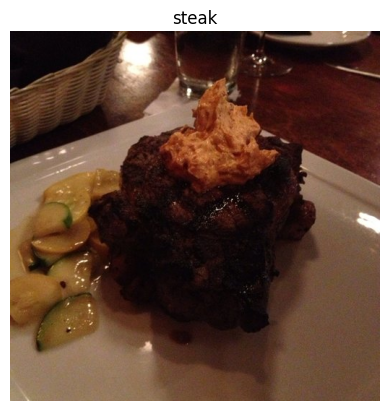

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="Data\\pizza_steak\\train\\",
                       target_class="steak")

In [10]:
img

array([[[ 11,   4,  11],
        [ 13,   6,  13],
        [ 16,   9,  16],
        ...,
        [ 11,   4,  11],
        [ 12,   6,  10],
        [ 13,   7,  11]],

       [[ 10,   3,  10],
        [ 12,   5,  12],
        [ 13,   6,  13],
        ...,
        [ 12,   6,  10],
        [ 14,   8,  12],
        [ 15,   9,  13]],

       [[ 15,   8,  15],
        [ 15,   8,  15],
        [ 15,   8,  15],
        ...,
        [ 15,   6,   9],
        [ 16,   7,  10],
        [ 17,   8,  11]],

       ...,

       [[165, 146, 116],
        [162, 143, 113],
        [162, 141, 112],
        ...,
        [108,  78,  52],
        [112,  80,  55],
        [103,  71,  46]],

       [[168, 151, 121],
        [164, 147, 117],
        [163, 143, 116],
        ...,
        [110,  80,  54],
        [115,  83,  58],
        [104,  72,  47]],

       [[175, 158, 128],
        [169, 152, 122],
        [166, 146, 119],
        ...,
        [112,  82,  56],
        [120,  88,  63],
        [109,  77,  52]]

In [11]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 11,   4,  11],
        [ 13,   6,  13],
        [ 16,   9,  16],
        ...,
        [ 11,   4,  11],
        [ 12,   6,  10],
        [ 13,   7,  11]],

       [[ 10,   3,  10],
        [ 12,   5,  12],
        [ 13,   6,  13],
        ...,
        [ 12,   6,  10],
        [ 14,   8,  12],
        [ 15,   9,  13]],

       [[ 15,   8,  15],
        [ 15,   8,  15],
        [ 15,   8,  15],
        ...,
        [ 15,   6,   9],
        [ 16,   7,  10],
        [ 17,   8,  11]],

       ...,

       [[165, 146, 116],
        [162, 143, 113],
        [162, 141, 112],
        ...,
        [108,  78,  52],
        [112,  80,  55],
        [103,  71,  46]],

       [[168, 151, 121],
        [164, 147, 117],
        [163, 143, 116],
        ...,
        [110,  80,  54],
        [115,  83,  58],
        [104,  72,  47]],

       [[175, 158, 128],
        [169, 152, 122],
        [166, 146, 119],
        ...,
        [112,  82,  5

In [12]:
# View the image shape
img.shape # Return width,height, color_channels

(512, 512, 3)

🔑**Note**: Many machine learning models. including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale(also referred to as normalize) thier pixel values by dividing the image arrays by 255 (since 255 is maximum pixel value).

In [13]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.04313725, 0.01568627, 0.04313725],
        [0.05098039, 0.02352941, 0.05098039],
        [0.0627451 , 0.03529412, 0.0627451 ],
        ...,
        [0.04313725, 0.01568627, 0.04313725],
        [0.04705882, 0.02352941, 0.03921569],
        [0.05098039, 0.02745098, 0.04313725]],

       [[0.03921569, 0.01176471, 0.03921569],
        [0.04705882, 0.01960784, 0.04705882],
        [0.05098039, 0.02352941, 0.05098039],
        ...,
        [0.04705882, 0.02352941, 0.03921569],
        [0.05490196, 0.03137255, 0.04705882],
        [0.05882353, 0.03529412, 0.05098039]],

       [[0.05882353, 0.03137255, 0.05882353],
        [0.05882353, 0.03137255, 0.05882353],
        [0.05882353, 0.03137255, 0.05882353],
        ...,
        [0.05882353, 0.02352941, 0.03529412],
        [0.0627451 , 0.02745098, 0.03921569],
        [0.06666667, 0.03137255, 0.04313725]],

       ...,

       [[0.64705882, 0.57254902, 0.45490196],
        [0.63529412, 0.56078431, 0.44313725],
        [0.63529412, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to: 
- Load our images
- Preprocess our images
- Build a CNN to find patterns in our images
- Compile our CNN
- Fit the CNN to our training data

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "Data\\pizza_steak\\train"
test_dir = "Data\\pizza_steak\\test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
# Set the seed
tf.random.set_seed(42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 62s 1s/step - loss: 0.6310 - accuracy: 0.6260 - val_loss: 0.4657 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 57s 1s/step - loss: 0.4640 - accuracy: 0.7940 - val_loss: 0.3803 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 61s 1s/step - loss: 0.4389 - accuracy: 0.8113 - val_loss: 0.3932 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 63s 1s/step - loss: 0.3966 - accuracy: 0.8393 - val_loss: 0.3703 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 66s 1s/step - loss: 0.3155 - accuracy: 0.8793 - val_loss: 0.3941 - val_accuracy: 0.8220


In [16]:
len(train_data)

47

In [17]:
1500/32 # 1500 total images and 32 images in a batches

46.875

In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same model as before

Let's replicate the model we've built ina previous section to see if it works with our image data.

The model we're building is from the [Tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.65902&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false):

In [19]:
tf.random.set_seed(42)

# Create a model to replicate the Tensorflow playgrpund model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                       epochs = 5,
                       steps_per_epoch= len(train_data),
                       validation_data = valid_data,
                       validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 23s 412ms/step - loss: 1.2394 - accuracy: 0.4927 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 18s 393ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 20s 430ms/step - loss: 0.6932 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 21s 439ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 17s 371ms/step - loss: 0.6932 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5000


In [20]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it

In [21]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data = valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 32s 587ms/step - loss: 4.7481 - accuracy: 0.6200 - val_loss: 0.8482 - val_accuracy: 0.6620
Epoch 2/5
47/47 [==============================] - 25s 538ms/step - loss: 0.8891 - accuracy: 0.6867 - val_loss: 1.2522 - val_accuracy: 0.6320
Epoch 3/5
47/47 [==============================] - 25s 525ms/step - loss: 0.9111 - accuracy: 0.6880 - val_loss: 0.8065 - val_accuracy: 0.5780
Epoch 4/5
47/47 [==============================] - 26s 557ms/step - loss: 0.6363 - accuracy: 0.7267 - val_loss: 0.4491 - val_accuracy: 0.7820
Epoch 5/5
47/47 [==============================] - 26s 559ms/step - loss: 0.6120 - accuracy: 0.7347 - val_loss: 0.5266 - val_accuracy: 0.7360


In [22]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


| Hyperparamter name                    | What does it do?                                                                                                                                 | Typical values                                                                     |
|---------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------|
| Filters                               | Decides how many filters should pass over an input tensor (e.g. sliding windows over an image)                                                   | 10, 32, 64, 128 (higher values lead to more complex models)                        |
| Kernal size (also called filter size) | Determines the shape of the filters (sliding windows) over the output                                                                            | 3, 5, 7 (lowers values learn smaller features, higher values learn large features) |
| Padding                               | Pads the target tensor with zeros (if "same") to preserve input shape. Or leaves in the target tensor as is (if "valid"), lowering output shape. | "same" or "valid"                                                                  |
| Strids                                | The number of steps a filter takes across an image at a time (e.g. if strids=1, a filter moves across an image 1 pixel at a time                 | 1 (default), 2                                                                     |


## Binary Classification

>1. Become one with the data (visualize, visualize, visualize)
>2. Preprocess the data (prepared it for our model, the step here was scaling/normalizing)
>3. Created a model (start with a baseline)
>4. Fit the model
>5. Evaluate the model
>6. Adjust different parameters and imrpove the model (try to beat our baseline)
>7. Repeat untill satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['1337814.jpg']
Image shape: (512, 512, 3)
['698251.jpg']
Image shape: (512, 512, 3)


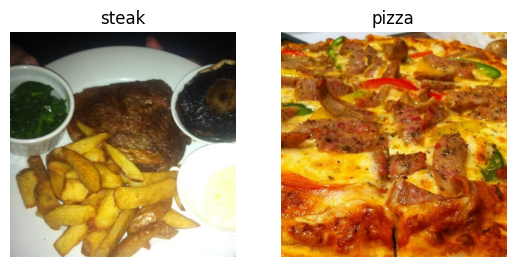

In [23]:
# Visualize
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("Data/pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("Data/pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for model)

In [24]:
# Define the directory dataset paths
train_dir = "Data\\pizza_steak\\train\\"
test_dir  = "Data\\pizza_steak\\test\\"

>Our next step is to turn our data into **batches**

>A batch is a small subset of data. Rather than look at all 1500 trainable images at one time, a model might only look at 32 at a time.

>It does this for a couple of reasons:
>* 1500 images (or more) might not fit into the memory of your processor(GPU)
>* Trying to learn the patterns in 1500 images onone hit could result in the model not being able to learn very well.

In [25]:
# Create train and test data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale = 1./255.)

In [26]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                              target_size=(224, 224), # Target size of images (hright, width)
                                              class_mode='binary', # type of data you're working with
                                              batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224, 224),
                                            class_mode='binary',
                                            batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the 'next' batch of images/labels in train_data 
len(images), len(labels)

(32, 32)

In [28]:
# How many batches are there?
len(train_data)

47

In [29]:
1500/32 # total images divided by batch size

46.875

In [30]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [31]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

>A Baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

>🔑**Note:** In Deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with someting simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [32]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [33]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # Filter is the number of sliding windows going across an input (higher = more complex models)
         kernel_size=3, # The size of the sliding window going across an input
         padding="valid", # if 'same', output shape is same as input shape, if 'valid' output shape gets compressed
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # output layer (working with binary classification so only 1 output neuron)
])

In [34]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

In [35]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Fit the model

In [36]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [37]:
# Fit the model
history_4 = model_4.fit(train_data, # This is the combination of labels and sample data
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 563s 12s/step - loss: 0.7040 - accuracy: 0.7000 - val_loss: 0.4735 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 88s 2s/step - loss: 0.4434 - accuracy: 0.7860 - val_loss: 0.3549 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 91s 2s/step - loss: 0.3566 - accuracy: 0.8593 - val_loss: 0.3559 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 92s 2s/step - loss: 0.2626 - accuracy: 0.9013 - val_loss: 0.4794 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 92s 2s/step - loss: 0.1626 - accuracy: 0.9480 - val_loss: 0.3368 - val_accuracy: 0.8660


### 5. Evaluate the model
It looks like our model is learning something, let'ss evaluate it

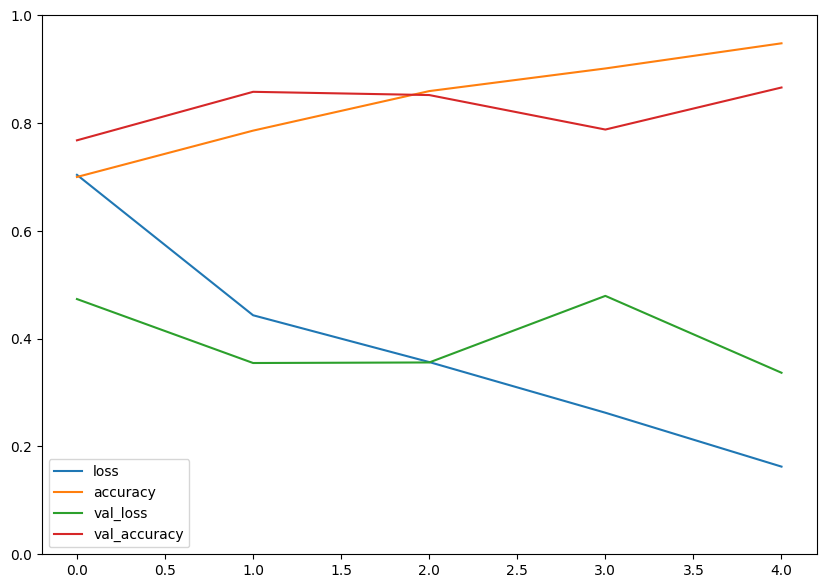

In [38]:
pd.DataFrame(history_4.history).plot(figsize=(10,7));
plt.ylim(0,1)
plt.show()

In [39]:
# Plot the validation and training curves separatly
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    #Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    #Plot the accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

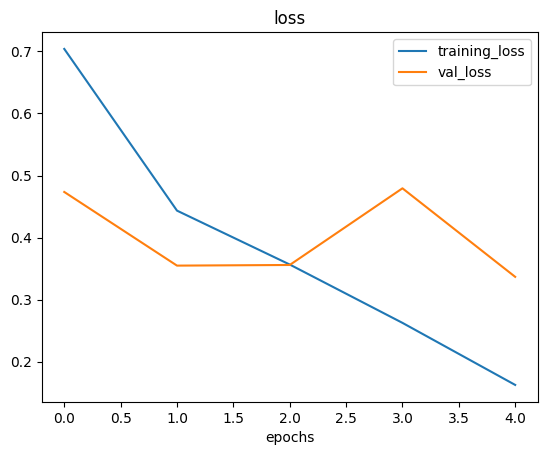

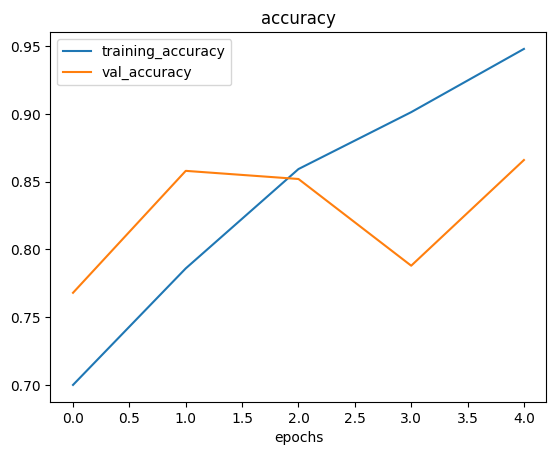

In [40]:
# Check out the loss and accuracy curve
plot_loss_curves(history_4)

>The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's large gap between the training curve and validation curve, it means your model is probably overfitting.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
1. Create a baseline
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layer
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add Regularization (such as MaxPool2D)
* Add more data 

In [41]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [42]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

In [43]:
history_5 = model_5.fit(train_data,
                       epochs = 5,
                       steps_per_epoch=len(train_data),
                       validation_data = test_data,
                       validation_steps= len(valid_data))

Epoch 1/5
47/47 [==============================] - 38s 688ms/step - loss: 0.6323 - accuracy: 0.6607 - val_loss: 0.4847 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 28s 591ms/step - loss: 0.4620 - accuracy: 0.7867 - val_loss: 0.3927 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 28s 603ms/step - loss: 0.4129 - accuracy: 0.8073 - val_loss: 0.3660 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 32s 680ms/step - loss: 0.3998 - accuracy: 0.8260 - val_loss: 0.3471 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 34s 711ms/step - loss: 0.3816 - accuracy: 0.8260 - val_loss: 0.3148 - val_accuracy: 0.8760


In [44]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

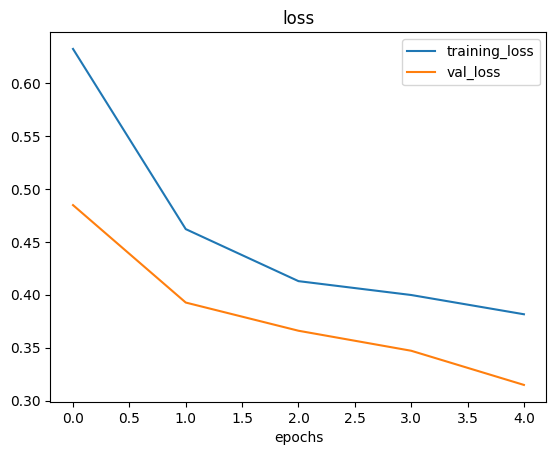

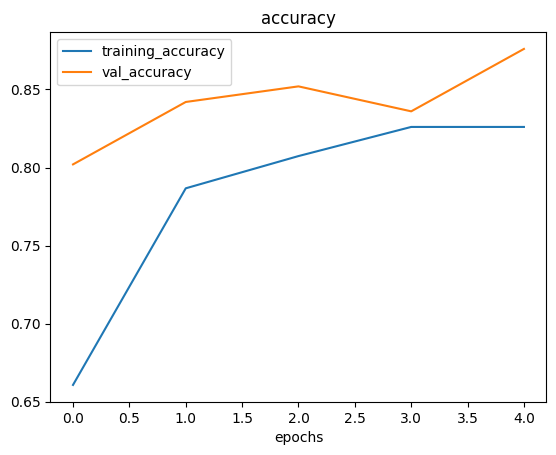

In [45]:
# Plot the loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [46]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                         rotation_range=0.2, # How much do you want to rotate an image
                                         shear_range=0.2, # how much do you want to shear an images
                                         zoom_range=0.2,
                                         width_shift_range=0.2, #Move your image aroung x-axis
                                         height_shift_range=0.3, #Move your image aroung y-axis
                                         horizontal_flip=True)

# Create ImageDataGenerator without data augmnetation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmnetation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> **Question:** What is data augmentation?

Data augmnetation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar

In [47]:
# Import data and augment it from training directory
print("Augmneted training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                               target_size=(224, 224),
                                                               batch_size=32,
                                                               class_mode='binary',
                                                               shuffle=False) # For Demostration purpose only

# create non-augmented train data batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='binary',
                                              shuffle=False)

IMG_SIZE = (224, 224)
#create Non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=IMG_SIZE,
                                            batch_size=32,
                                            class_mode='binary') 

Augmneted training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


>🔑**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into model.

Finally....let's visualize some augmented data!!!

In [48]:
# GEt sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)

Showing image number: 0


(-0.5, 223.5, 223.5, -0.5)

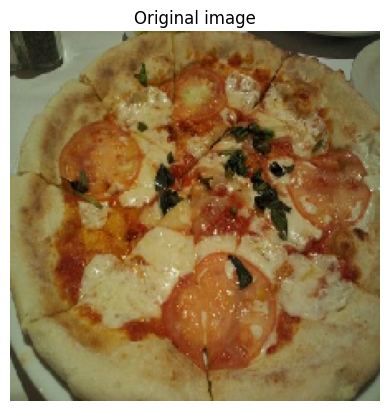

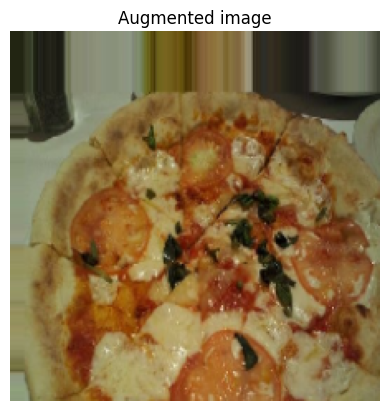

In [49]:
# Show oirginal image and augmented images
import random
random_number = random.randint(0, 32) # Our batch size is 32
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f'Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

Now we've seen what augmented training data looks like, let's build a model and see how it learns

In [50]:
# Fitting on augmneted training data
model_6 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                       epochs=5,
                       steps_per_epoch=len(train_data_augmented),
                       validation_data= test_data,
                       validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 76s 1s/step - loss: 0.7012 - accuracy: 0.4407 - val_loss: 0.6883 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 72s 2s/step - loss: 0.6905 - accuracy: 0.4980 - val_loss: 0.6734 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 70s 1s/step - loss: 0.6996 - accuracy: 0.5593 - val_loss: 0.6624 - val_accuracy: 0.5160
Epoch 4/5
47/47 [==============================] - 70s 1s/step - loss: 0.6841 - accuracy: 0.5513 - val_loss: 0.6689 - val_accuracy: 0.6060
Epoch 5/5
47/47 [==============================] - 73s 2s/step - loss: 0.6752 - accuracy: 0.6160 - val_loss: 0.6242 - val_accuracy: 0.6960


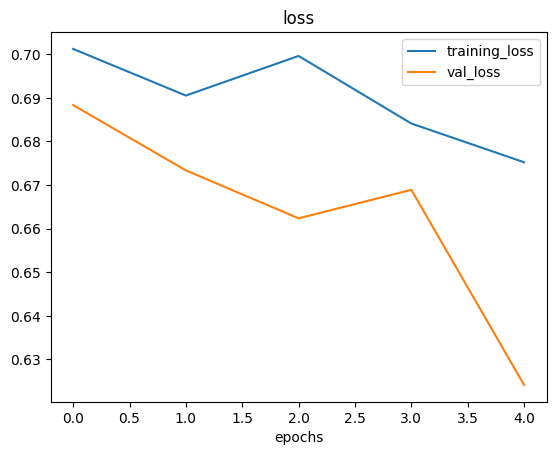

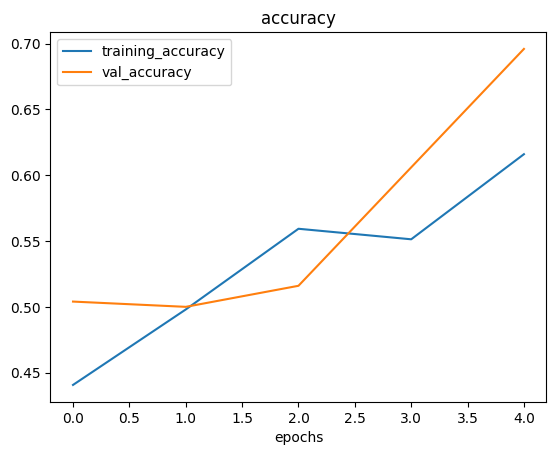

In [51]:
# Check our model training curves
plot_loss_curves(history_6)

Let's suffle our augmneted training data and train another model (the same as before) on it and see what happens

In [52]:
# Import data and augment it and shuffle from training directory
train_data_augmented_suffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                               target_size=(224, 224),
                                                               batch_size=32,
                                                               class_mode='binary',
                                                               shuffle=True) # Shuffle data this time

Found 1500 images belonging to 2 classes.


In [53]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

history_7 = model_7.fit(train_data_augmented_suffled, # We're fitting on augmented and shuffle data now
                        epochs=5,
                        steps_per_epoch= len(train_data_augmented_suffled),
                        validation_data= test_data,
                        validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 75s 2s/step - loss: 0.6370 - accuracy: 0.6433 - val_loss: 0.5356 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 72s 2s/step - loss: 0.5547 - accuracy: 0.7160 - val_loss: 0.4277 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 70s 1s/step - loss: 0.5192 - accuracy: 0.7440 - val_loss: 0.3896 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 71s 2s/step - loss: 0.4832 - accuracy: 0.7773 - val_loss: 0.3605 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 69s 1s/step - loss: 0.4894 - accuracy: 0.7793 - val_loss: 0.3579 - val_accuracy: 0.8520


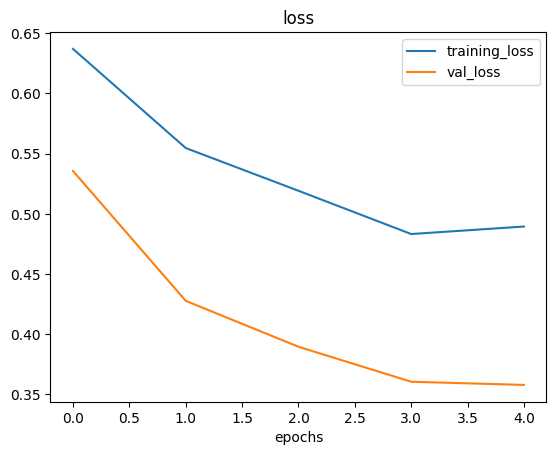

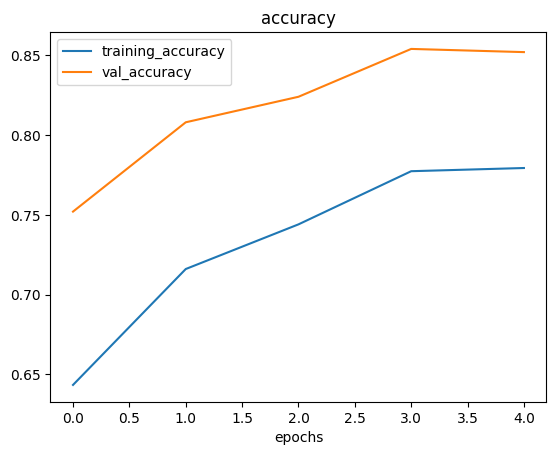

In [54]:
# Plot the loss curves
plot_loss_curves(history_7)

>🔑**Note:** When shuffling training data, the model gets exposed to all different kinds of training, thus enabling it to learn feautures a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat untill satisfied

Since  we've already beaten our baseline, there are a few things we could try to contrinue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/ `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find the ideal learning rate
* Get more data (give the model opportunities to learn)
* Use **tranfer learning** to leverage what another image model has learn and adjust t for our use case

### Making a prediction with our trained model on our own custom data

In [55]:
print(class_names)

['pizza' 'steak']


(-0.5, 3023.5, 4031.5, -0.5)

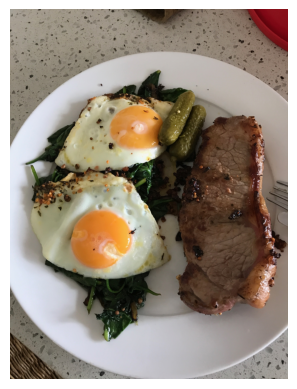

In [56]:
import matplotlib.image as mpimg
steak = mpimg.imread('Custom_data/03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

>🔑**Note:** When you a train a neural network and you want to make a prediction with it on your own custom data, it's important than your custom data (or new data) is preprocesses in to the same format as the data your model was trained on.

In [57]:
steak.shape

(4032, 3024, 3)

#### Creating a helper function to load and preprocess the image

In [59]:
# Create a functiont to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename and turn it into a tensor and reshapes 
    it to (img_shape, img_shape, color_channels).
    """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    #Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image and (get all values between 0 and 1)
    img = img/255
    return img

In [60]:
# Load in and preprocess our custom image
steak = load_and_prep_image("Custom_data/03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [61]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 1s 937ms/step


array([[0.82849]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visuslize the image as well as the model's prediction?

In [62]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [63]:
# WE can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [64]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model
    and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    #Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]

    #Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

1/1 [==============================] - 0s 296ms/step


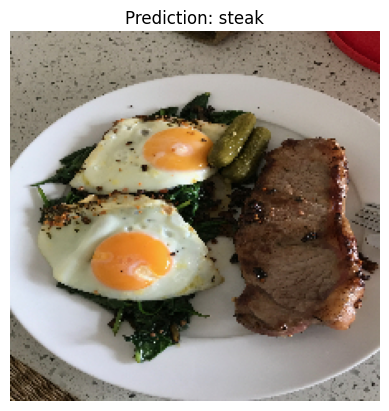

In [65]:
# Test our model on custom image
pred_and_plot(model_7, "Custom_data/03-steak.jpeg")

Our model got the prediction right

1/1 [==============================] - 0s 26ms/step


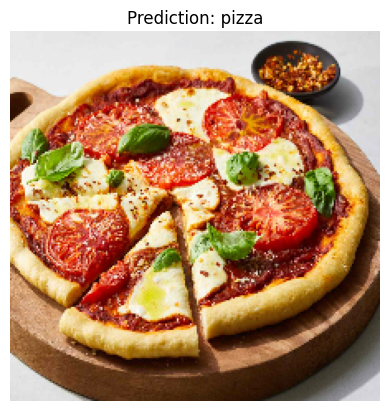

In [67]:
pred_and_plot(model_7, "Custom_data/Pizza.jpg")